In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
S0 = 100.0              # spot stock price
K = 100.0               # strike
T = 1.0                 # maturity 
r = 0.1                 # risk free rate 
sig = 0.2               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [4]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [5]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [6]:
S

array([[100.        , 112.24009024, 125.97837858, 141.39824581],
       [  0.        ,  89.09472523, 100.        , 112.24009024],
       [  0.        ,   0.        ,  79.37870064,  89.09472523],
       [  0.        ,   0.        ,   0.        ,  70.72223522]])

In [7]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.6176090164403981

In [8]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 10.90527477],
       [ 0.        ,  0.        ,  0.        , 29.27776478]])

In [9]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 4.15461967,  1.49175992,  0.        ,  0.        ],
       [ 0.        ,  8.82373471,  4.0333673 ,  0.        ],
       [ 0.        ,  0.        , 17.34290941, 10.90527477],
       [ 0.        ,  0.        ,  0.        , 29.27776478]])

In [10]:
print('European ' + payoff, str( V[0,0]))

European put 4.154619665678642


In [11]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 4.92448707,  1.49175992,  0.        ,  0.        ],
       [ 0.        , 10.90527477,  4.0333673 ,  0.        ],
       [ 0.        ,  0.        , 20.62129936, 10.90527477],
       [ 0.        ,  0.        ,  0.        , 29.27776478]])

In [12]:
print('American ' + payoff, str( V[0,0]))

American put 4.924487073316837


In [13]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [14]:
T = 1
r = 0.1
sigma = 0.2
S0 = 100
K = 100

In [15]:
S = mcs_simulation_np(1000)

In [16]:
S = np.transpose(S)
S

array([[100.        , 100.05504804,  99.66864763, ..., 141.78173697,
        143.49263722, 143.66021829],
       [100.        ,  98.92887529,  98.46373315, ..., 115.68164694,
        116.0543994 , 115.77233595],
       [100.        , 101.07378344, 100.97201638, ..., 125.90803173,
        126.27224613, 127.11100207],
       ...,
       [100.        , 100.78951799, 100.17402191, ...,  94.21628361,
         93.16976874,  93.77734408],
       [100.        ,  99.1411713 ,  98.50632339, ..., 105.1346223 ,
        105.22950555, 104.97967285],
       [100.        , 100.2011375 , 100.36927745, ...,  93.02371828,
         92.72959335,  92.90099356]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

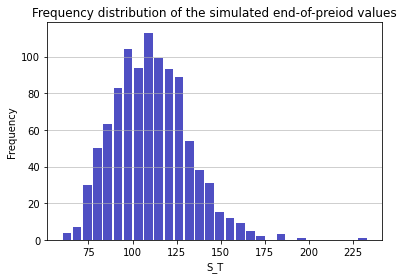

In [17]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [18]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 3.9947073863221503


In [19]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 14.574032842079832


In [20]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=6af0d1ad2022aaaa67c0947e4c15875f8d5d9f674e1f1079a174f180d84dab92
  Stored in directory: /Users/jamesademuyiwa/Library/Caches/pip/wheels/b4/c3/39/9c01ae2b4726f37024bba5592bec868b47a2fab5a786e8979a
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=2292cadb5a8c4b8894711c99e33f5bb270bb228ee7f9f10ca4fe6180306f1fa6
  Stored in directory: /Users/jamesademuyiwa/Library/Caches/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [21]:
import yfinance as yf
import numpy as np
import pandas as pd

In [22]:
data = yf.download("AMZN TSLA", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  2 of 2 completed


In [23]:
data.tail()

Adj Close                    Close                     High  \
                   AMZN        TSLA         AMZN        TSLA         AMZN   
Date                                                                        
2021-02-22  3180.739990  714.500000  3180.739990  714.500000  3232.320068   
2021-02-23  3194.500000  698.840027  3194.500000  698.840027  3204.729980   
2021-02-24  3159.530029  742.020020  3159.530029  742.020020  3171.229980   
2021-02-25  3057.159912  682.219971  3057.159912  682.219971  3178.260010   
2021-02-26  3092.929932  675.500000  3092.929932  675.500000  3122.439941   

                                Low                     Open              \
                  TSLA         AMZN        TSLA         AMZN        TSLA   
Date                                                                       
2021-02-22  768.500000  3172.260010  710.200012  3208.129883  762.640015   
2021-02-23  713.609985  3093.600098  619.000000  3127.030029  662.130005   
2021-02-24  745.000000  3125.379883  694.169983  3166.750000  711.849976   
2021-02-25  737.210022  3047.760010  670.580017  3136.739990  726.150024   
2021-02-26  706.700012  3036.699951  659.510010  3095.199951  700.000000   

             Volume            
               AMZN      TSLA  
Date                           
2021-02-22  3515700  37269700  
2021-02-23  4677200  66606900  
2021-02-24  3011300  36767000  
2021-02-25  4533800  39023900  
2021-02-26  4273500  41011300

In [24]:
ADJ =  data['Adj Close']
ADJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-03-02 to 2021-02-26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    251 non-null    float64
 1   TSLA    251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

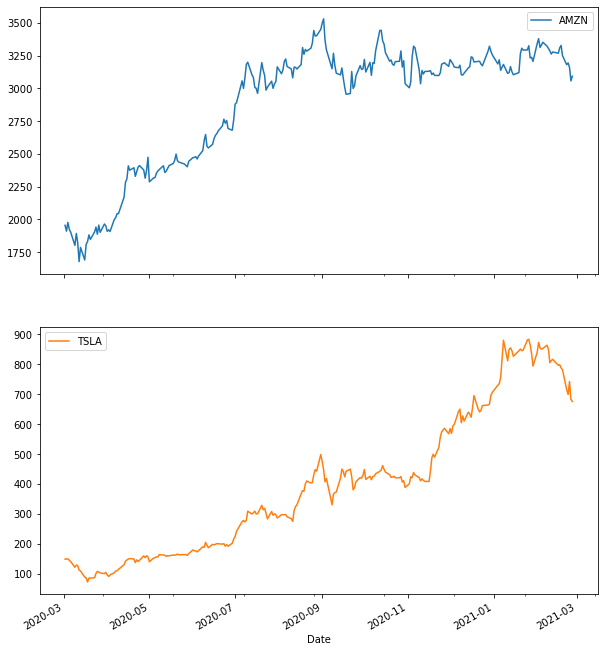

In [25]:
ADJ.plot(figsize=(10, 12), subplots=True)

In [26]:
ADJ.describe().round(2)

,AMZN,TSLA
count,251.00,251.00
mean,2877.47,394.25
std,475.36,235.65
min,1676.61,72.24
25%,2471.72,169.94
50%,3111.89,387.79
75%,3205.60,561.49
max,3531.45,883.09


In [27]:
rets = np.log(ADJ / ADJ.shift(1))
rets.head().round(4)

,AMZN,TSLA
Date,,
2020-03-02,NaN,NaN
2020-03-03,-0.0233,0.0025
2020-03-04,0.0344,0.0053
2020-03-05,-0.0266,-0.0339
2020-03-06,-0.0120,-0.0295


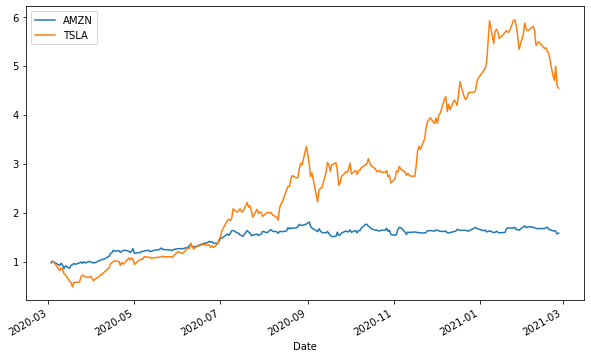

In [28]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [29]:
sym = 'AMZN'
AMZN_data = pd.DataFrame(ADJ[sym]).dropna()
AMZN_data.tail()

,AMZN
Date,
2021-02-22,3180.739990
2021-02-23,3194.500000
2021-02-24,3159.530029
2021-02-25,3057.159912
2021-02-26,3092.929932


In [30]:
AMZN_data['SMA1'] = ADJ[sym].rolling(window=20).mean()
AMZN_data['SMA2'] = ADJ[sym].rolling(window=60).mean()
AMZN_data[[sym, 'SMA1', 'SMA2']].tail()

,AMZN,SMA1,SMA2
Date,,,
2021-02-22,3180.739990,3290.295471,3222.121818
2021-02-23,3194.500000,3285.320471,3223.395817
2021-02-24,3159.530029,3276.990479,3222.970150
2021-02-25,3057.159912,3268.219470,3220.667147
2021-02-26,3092.929932,3260.984961,3219.415312


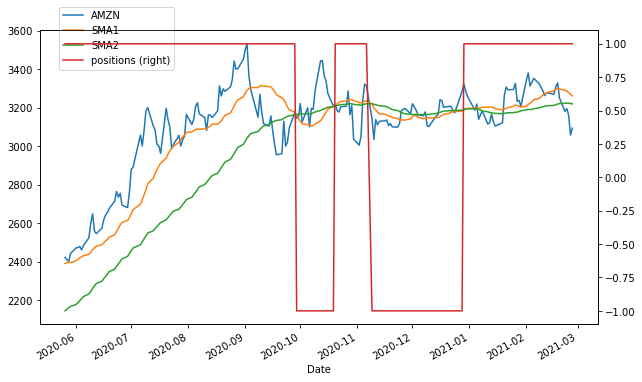

In [31]:
AMZN_data.dropna(inplace=True)
AMZN_data['positions'] = np.where(AMZN_data['SMA1'] > AMZN_data['SMA2'],1,-1)
ax = AMZN_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

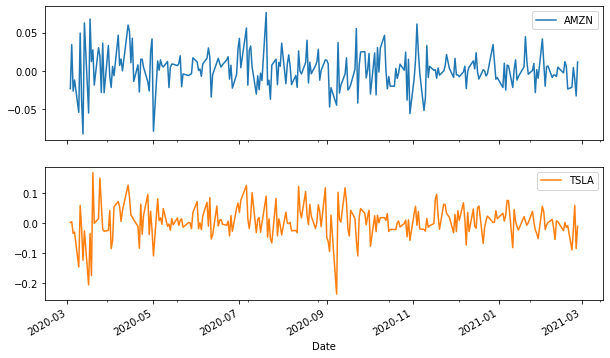

In [32]:
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 6))

array([[<AxesSubplot:xlabel='AMZN', ylabel='AMZN'>,
        <AxesSubplot:xlabel='TSLA', ylabel='AMZN'>],
       [<AxesSubplot:xlabel='AMZN', ylabel='TSLA'>,
        <AxesSubplot:xlabel='TSLA', ylabel='TSLA'>]], dtype=object)

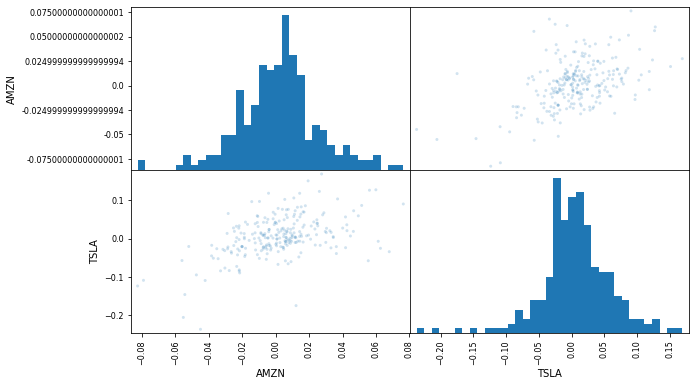

In [33]:
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

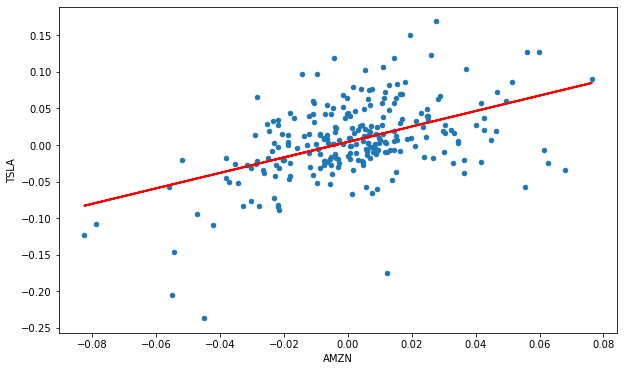

In [34]:
reg = np.polyfit(rets['AMZN'], rets['TSLA'], deg=1)
ax = rets.plot(kind='scatter', x='AMZN', y='TSLA', figsize=(10, 6))
ax.plot(rets['AMZN'], np.polyval(reg, rets['AMZN']), 'r', lw=2);

In [35]:
rets.corr()

,AMZN,TSLA
AMZN,1.000000,0.477949
TSLA,0.477949,1.000000


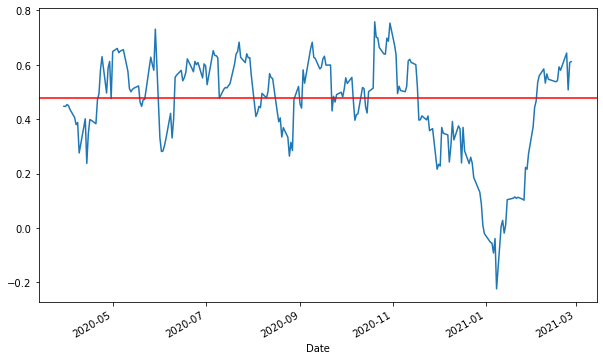

In [36]:
ax = rets['AMZN'].rolling(window=20).corr(rets['TSLA']).plot(figsize=(10, 6)) 
ax.axhline(rets.corr().iloc[0, 1], c='r');